## Import the trained model

In [1]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 3.2 MB/s eta 0:00:0000:0100:01
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 KB 3.8 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

### Exmaple of a word as a vector

In [3]:
# Let us look hwo the vector embedding of a word looks like

print(model["man"])


[ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455   0.02880859 -0.25
 -0.08398438 -0.15136719 -0.10205078  0.04077148 -0.09765625  0.05932617
  0.02978516 -0.10058594 -0.13085938  0.001297    0.02612305 -0.27148438
  0.06396484 -0.19140625 -0.078125    0.25976562  0.375      -0.04541016
  0.16210938  0.13671875 -0.06396484 -0.02062988 -0.09667969  0.25390625
  0.24804688 -0.12695312  0.07177734  0.3203125   0.03149414 -0.03857422
  0.21191406 -0.00811768  0.22265625 -0.13476562 -0.07617188  0.01049805
 -0.05175781  0.03808594 -0.13378906  0.125       0.0559082  -0.18261719
  0.08154297 -0.08447266 -0.07763672 -0.04345703  0.08105469 -0.01092529
  0.17480469  0.30664062 -0.04321289 -0.01416016  0.09082031 -0.00927734
 -0.03442383 -0.11523438  0.12451172 -0.0246582   0.08544922  0.14355469
 -0.27734375  0.03662109 -0.11035156  0.13085938 -0.01721191 -0.08056641
 -0.00708008 -0.02954102  0.30078125 -0.09033203  0.03149

In [4]:
print(model['man'].shape)


(300,)


## Similar words in vector embeddings

### King + Women - Man

In [5]:
# example of using most similar vector embeddings
print(model.most_similar(positive=["king", "women"], negative=["man"], topn=10))

[('queen', 0.4827326238155365), ('queens', 0.466781347990036), ('kumaris', 0.4653734564781189), ('kings', 0.4558638632297516), ('womens', 0.422832190990448), ('princes', 0.4176960587501526), ('Al_Anqari', 0.41725507378578186), ('concubines', 0.4011078476905823), ('monarch', 0.3962482810020447), ('monarchy', 0.39430150389671326)]


### Most similar words

In [9]:

model.most_similar("vehicle", topn=10)

[('car', 0.7821096181869507),
 ('SUV', 0.7577638626098633),
 ('vehicles', 0.7492177486419678),
 ('minivan', 0.72130286693573),
 ('Jeep', 0.704788327217102),
 ('pickup_truck', 0.7040186524391174),
 ('truck', 0.702707052230835),
 ('Ford_Explorer', 0.6987137198448181),
 ('vehcile', 0.6957592964172363),
 ('Chevy_Trailblazer', 0.6605548858642578)]

## Creating Token Embeddings

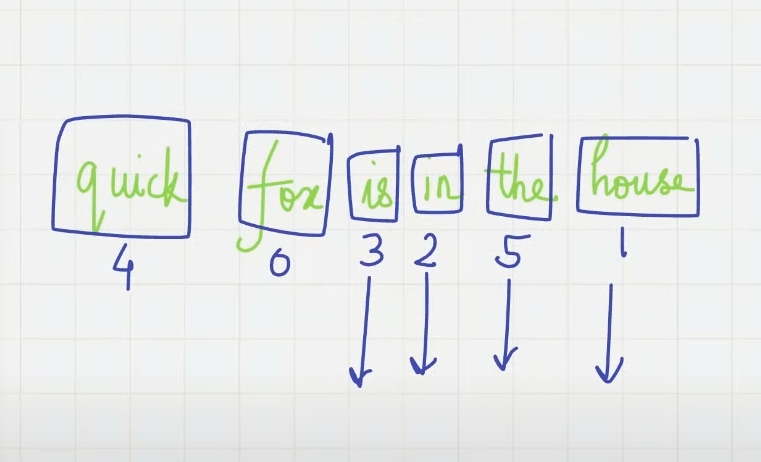

In [10]:
import torch

input_ids = torch.tensor([2, 3, 5, 1])


In [11]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

embedding_layer

Embedding(6, 3)

In [12]:
embedding_layer.weight

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)

In [13]:
embedding_layer(torch.tensor([3]))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)

In [15]:
embedding_layer(input_ids)

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)